In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
testdata = pd.read_csv('testData.txt', sep=',')
traindata = pd.read_csv('trainData.txt', sep=',')

testdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB


In [3]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [7]:
X = traindata.iloc[:5000, 1:6]
Y = testdata.iloc[:5000, -1:]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=0)

In [8]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(4000, 5) (4000, 1) (1000, 5) (1000, 1)


In [9]:
model = tf.keras.Sequential()
model.add(Dense(16, activation='relu',input_shape=(5, ))) 
model.add(Dense(32, activation='softplus')) 
model.add(Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


In [10]:
lossfunction = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer= 'adam', loss= lossfunction, metrics=['accuracy'])

In [11]:
fitmodel = model.fit(train_x, train_y, epochs=5, validation_split=0.3)

Epoch 1/5
88/88 [==============================] - 1s 5ms/step - loss: 7.0744 - accuracy: 0.7018 - val_loss: 0.6518 - val_accuracy: 0.7333
Epoch 2/5
88/88 [==============================] - 0s 3ms/step - loss: 0.6113 - accuracy: 0.7486 - val_loss: 0.5967 - val_accuracy: 0.7367
Epoch 3/5
88/88 [==============================] - 0s 3ms/step - loss: 0.5771 - accuracy: 0.7796 - val_loss: 0.5465 - val_accuracy: 0.7667
Epoch 4/5
88/88 [==============================] - 0s 3ms/step - loss: 0.5442 - accuracy: 0.7800 - val_loss: 0.6062 - val_accuracy: 0.7033
Epoch 5/5
88/88 [==============================] - 0s 3ms/step - loss: 0.5270 - accuracy: 0.8007 - val_loss: 0.5020 - val_accuracy: 0.8017


In [12]:
training_loss, training_acc = model.evaluate(train_x, train_y)
testing_loss, testing_acc = model.evaluate(test_x, test_y)

32/32 [==============================] - 0s 2ms/step - loss: 0.5096 - accuracy: 0.8030


In [13]:
pred = model.predict(test_x)
test_pred = np.argmax(pred, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels= test_y, predictions=test_pred)
print(confusion_matrix)

32/32 [==============================] - 0s 4ms/step
tf.Tensor(
[[804   0]
 [196   0]], shape=(2, 2), dtype=int32)


Epoch 1/5
88/88 [==============================] - 1s 7ms/step - loss: 0.5293 - accuracy: 0.8054 - val_loss: 0.4893 - val_accuracy: 0.8183
Epoch 2/5
88/88 [==============================] - 1s 6ms/step - loss: 0.4738 - accuracy: 0.8196 - val_loss: 0.6357 - val_accuracy: 0.7067
Epoch 3/5
88/88 [==============================] - 0s 5ms/step - loss: 0.4661 - accuracy: 0.8214 - val_loss: 0.4427 - val_accuracy: 0.8133
Epoch 4/5
88/88 [==============================] - 0s 5ms/step - loss: 0.4340 - accuracy: 0.8232 - val_loss: 0.4165 - val_accuracy: 0.8333
Epoch 5/5
88/88 [==============================] - 0s 5ms/step - loss: 0.4228 - accuracy: 0.8311 - val_loss: 0.4096 - val_accuracy: 0.8458


Text(0, 0.5, 'Accuracy')

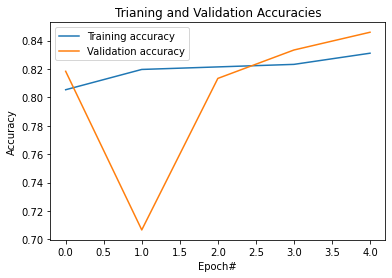

In [14]:
fitModel = model.fit(train_x, train_y, epochs = 5, validation_split = 0.3)


plt.plot(fitModel.history['accuracy'])
plt.plot(fitModel.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Trianing and Validation Accuracies')
plt.xlabel('Epoch#')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

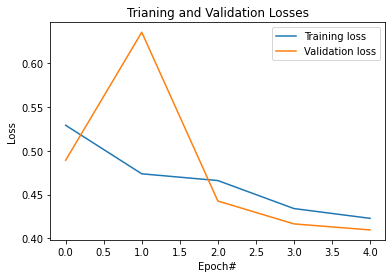

In [15]:
plt.plot(fitModel.history['loss'])
plt.plot(fitModel.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Trianing and Validation Losses')
plt.xlabel('Epoch#')
plt.ylabel('Loss')

c) This is a three layer model with accuracy 80%

In [16]:
test_predict = model.predict(test_x)
test_predict_labels = np.argmax(test_predict, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = test_y, predictions = test_predict_labels)
print('confusion Matrix\n', confusion_matrix)

32/32 [==============================] - 0s 1ms/step
confusion Matrix
 tf.Tensor(
[[804   0]
 [196   0]], shape=(2, 2), dtype=int32)


In [17]:
model2 = tf.keras.Sequential()
model2.add(Dense(16, activation='relu',input_shape=(5, ))) 
model2.add(Dense(32, activation='softplus'))
model2.add(Dense(32, activation='softplus')) 
model2.add(Dense(1, activation='sigmoid')) 

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                96        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________


In [18]:
lossfunction = tf.keras.losses.BinaryCrossentropy()
model2.compile(optimizer= 'adam', loss= lossfunction, metrics=['accuracy'])

In [19]:
fitmodel = model2.fit(train_x, train_y, epochs=5, validation_split=0.3)

Epoch 1/5
88/88 [==============================] - 1s 5ms/step - loss: 7.3255 - accuracy: 0.6586 - val_loss: 0.6701 - val_accuracy: 0.7058
Epoch 2/5
88/88 [==============================] - 0s 3ms/step - loss: 0.6719 - accuracy: 0.7489 - val_loss: 0.9775 - val_accuracy: 0.7958
Epoch 3/5
88/88 [==============================] - 0s 3ms/step - loss: 0.5778 - accuracy: 0.7621 - val_loss: 0.5981 - val_accuracy: 0.7917
Epoch 4/5
88/88 [==============================] - 0s 3ms/step - loss: 0.5458 - accuracy: 0.7786 - val_loss: 0.4943 - val_accuracy: 0.7900
Epoch 5/5
88/88 [==============================] - 0s 3ms/step - loss: 0.5053 - accuracy: 0.7875 - val_loss: 0.5143 - val_accuracy: 0.7167


In [20]:
training_loss, training_acc = model2.evaluate(train_x, train_y)
testing_loss, testing_acc = model2.evaluate(test_x, test_y)

32/32 [==============================] - 0s 2ms/step - loss: 0.5132 - accuracy: 0.7020


In [21]:
pred = model2.predict(test_x)
test_pred = np.argmax(pred, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels= test_y, predictions=test_pred)
print(confusion_matrix)

32/32 [==============================] - 0s 2ms/step
tf.Tensor(
[[804   0]
 [196   0]], shape=(2, 2), dtype=int32)


Epoch 1/5
88/88 [==============================] - 0s 4ms/step - loss: 0.5206 - accuracy: 0.7893 - val_loss: 0.4635 - val_accuracy: 0.8075
Epoch 2/5
88/88 [==============================] - 0s 3ms/step - loss: 0.5225 - accuracy: 0.7896 - val_loss: 0.7795 - val_accuracy: 0.8075
Epoch 3/5
88/88 [==============================] - 0s 4ms/step - loss: 0.4832 - accuracy: 0.8004 - val_loss: 0.5060 - val_accuracy: 0.8075
Epoch 4/5
88/88 [==============================] - 0s 3ms/step - loss: 0.4748 - accuracy: 0.8021 - val_loss: 0.4645 - val_accuracy: 0.8058
Epoch 5/5
88/88 [==============================] - 0s 3ms/step - loss: 0.4661 - accuracy: 0.8011 - val_loss: 0.4278 - val_accuracy: 0.8133


Text(0, 0.5, 'Accuracy')

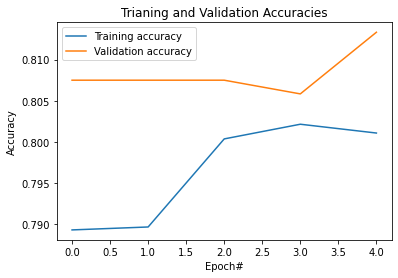

In [22]:
fitModel = model2.fit(train_x, train_y, epochs = 5, validation_split = 0.3)


plt.plot(fitModel.history['accuracy'])
plt.plot(fitModel.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Trianing and Validation Accuracies')
plt.xlabel('Epoch#')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

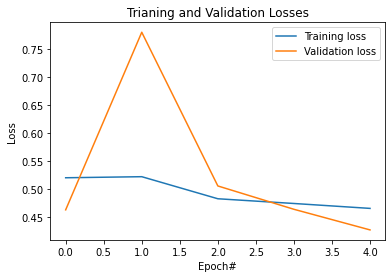

In [23]:
plt.plot(fitModel.history['loss'])
plt.plot(fitModel.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Trianing and Validation Losses')
plt.xlabel('Epoch#')
plt.ylabel('Loss')